In [4]:
from urllib.request import urlopen as urlReq
import requests
import csv
from bs4 import BeautifulSoup

quote_page = 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-000413.txt'
page = urlReq(quote_page)
page_html=page.read()
page.close()
soup = BeautifulSoup(page_html,'html.parser')
txt = soup.get_text()
txt[:1000] #first thousands words of text data


'-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc-Type: 2001,MIC-CLEAR\nOriginator-Name: webmaster@www.sec.gov\nOriginator-Key-Asymmetric:\n MFgwCgYEVQgBAQICAf8DSgAwRwJAW2sNKK9AVtBzYZmr6aGjlWyK3XmZv3dTINen\n TWSM7vrzLADbmYQaionwg5sDW3P6oaM5D3tdezXMm7z1T+B+twIDAQAB\nMIC-Info: RSA-MD5,RSA,\n EvPdKfnjzBIjWkEk2RgNCk1/52qXomHpN+LDwL/XTT/XBuAzk70AYYrsxlQbyiqr\n V5559QRyTgPe9PfVt0db9Q==\n\n0000950170-98-000413.txt : 19980309\n0000950170-98-000413.hdr.sgml : 19980309\nACCESSION NUMBER:\t\t0000950170-98-000413\nCONFORMED SUBMISSION TYPE:\t10-K405\nPUBLIC DOCUMENT COUNT:\t\t21\nCONFORMED PERIOD OF REPORT:\t19971228\nFILED AS OF DATE:\t\t19980306\nSROS:\t\t\tNYSE\n\nFILER:\n\n\tCOMPANY DATA:\t\n\t\tCOMPANY CONFORMED NAME:\t\t\tSUNBEAM CORP/FL/\n\t\tCENTRAL INDEX KEY:\t\t\t0000003662\n\t\tSTANDARD INDUSTRIAL CLASSIFICATION:\tELECTRIC HOUSEWARES & FANS [3634]\n\t\tIRS NUMBER:\t\t\t\t251638266\n\t\tSTATE OF INCORPORATION:\t\t\tDE\n\t\tFISCAL YEAR END:\t\t\t1229\n\n\tFILING VALUES:\n\t\tFORM TYPE:\t\t1

In [5]:
#tokenization

import re
import nltk
nltk.download('punkt') ##use for word tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
tokens=re.findall('[a-zA-Z]+', txt)

tokens_without_stopwords=[]

for w in tokens:
    if w not in stopwords.words('english'):
        if len(w) >=3:
            tokens_without_stopwords.append(str.lower(w))

        
tokens_without_stopwords[:100] #first 100 words



[nltk_data] Downloading package punkt to /home/ravi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['begin',
 'privacy',
 'enhanced',
 'message',
 'proc',
 'type',
 'mic',
 'clear',
 'originator',
 'name',
 'webmaster',
 'www',
 'sec',
 'gov',
 'originator',
 'key',
 'asymmetric',
 'mfgwcgyevqgbaqicaf',
 'dsgawrwjaw',
 'snkk',
 'avtbzyzmr',
 'agjlwyk',
 'xmzv',
 'dtinen',
 'twsm',
 'vrzladbmyqaionwg',
 'sdw',
 'oam',
 'tdezxmm',
 'twidaqab',
 'mic',
 'info',
 'rsa',
 'rsa',
 'evpdkfnjzbijwkek',
 'rgnck',
 'qxomhpn',
 'ldwl',
 'xtt',
 'xbuazk',
 'ayyrsxlqbyiqr',
 'qrytgpe',
 'pfvt',
 'txt',
 'hdr',
 'sgml',
 'accession',
 'number',
 'conformed',
 'submission',
 'type',
 'public',
 'document',
 'count',
 'conformed',
 'period',
 'report',
 'filed',
 'date',
 'sros',
 'nyse',
 'filer',
 'company',
 'data',
 'company',
 'conformed',
 'name',
 'sunbeam',
 'corp',
 'central',
 'index',
 'key',
 'standard',
 'industrial',
 'classification',
 'electric',
 'housewares',
 'fans',
 'irs',
 'number',
 'state',
 'incorporation',
 'fiscal',
 'year',
 'end',
 'filing',
 'values',
 'form',
 'type',

In [6]:
from nltk.stem import WordNetLemmatizer
w_lem=WordNetLemmatizer()
lemmed_word=[w_lem.lemmatize(w) for w in tokens_without_stopwords]
print(lemmed_word[:100]) #print first 100 lemmed word(base form of verb)


['begin', 'privacy', 'enhanced', 'message', 'proc', 'type', 'mic', 'clear', 'originator', 'name', 'webmaster', 'www', 'sec', 'gov', 'originator', 'key', 'asymmetric', 'mfgwcgyevqgbaqicaf', 'dsgawrwjaw', 'snkk', 'avtbzyzmr', 'agjlwyk', 'xmzv', 'dtinen', 'twsm', 'vrzladbmyqaionwg', 'sdw', 'oam', 'tdezxmm', 'twidaqab', 'mic', 'info', 'rsa', 'rsa', 'evpdkfnjzbijwkek', 'rgnck', 'qxomhpn', 'ldwl', 'xtt', 'xbuazk', 'ayyrsxlqbyiqr', 'qrytgpe', 'pfvt', 'txt', 'hdr', 'sgml', 'accession', 'number', 'conformed', 'submission', 'type', 'public', 'document', 'count', 'conformed', 'period', 'report', 'filed', 'date', 'sros', 'nyse', 'filer', 'company', 'data', 'company', 'conformed', 'name', 'sunbeam', 'corp', 'central', 'index', 'key', 'standard', 'industrial', 'classification', 'electric', 'housewares', 'fan', 'irs', 'number', 'state', 'incorporation', 'fiscal', 'year', 'end', 'filing', 'value', 'form', 'type', 'sec', 'act', 'sec', 'file', 'number', 'film', 'number', 'business', 'address', 'street',

In [7]:
ma=len(lemmed_word)*0.1
mi=30


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(min_df=mi,max_df=ma)
sentence_transform = vectorizer.fit_transform(lemmed_word)


In [9]:
print(vectorizer.get_feature_names()[:100]) #first 100 feature_name of corpus
print('=='*20)
print(len(vectorizer.get_feature_names()))

['ability', 'accordance', 'account', 'accounting', 'accrued', 'acquire', 'acquisition', 'act', 'action', 'activity', 'addition', 'additional', 'address', 'adjustment', 'administrative', 'adverse', 'advisor', 'affect', 'affiliate', 'agent', 'aggregate', 'agree', 'agreed', 'agreement', 'agrees', 'all', 'also', 'amended', 'amendment', 'among', 'amount', 'and', 'annex', 'anniversary', 'annual', 'another', 'anticipated', 'any', 'applicable', 'appropriate', 'approval', 'approximately', 'arising', 'arrangement', 'article', 'ascribed', 'asset', 'assigned', 'assignment', 'authority', 'authorization', 'authorized', 'available', 'award', 'balance', 'bank', 'base', 'based', 'basis', 'become', 'beginning', 'behalf', 'beneficial', 'beneficiary', 'benefit', 'best', 'binding', 'board', 'brand', 'breach', 'business', 'buyer', 'capital', 'case', 'cash', 'category', 'cause', 'certain', 'certificate', 'chairman', 'change', 'charge', 'chief', 'circumstance', 'claim', 'clause', 'closing', 'code', 'coleman',

In [10]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [11]:
import numpy as np
feature_names = vectorizer.get_feature_names()
vector = np.asarray(sentence_transform.sum(axis=0)).ravel()
combined = list(zip(feature_names,vector))
x, y = (list(x) for x in zip(*sorted(combined, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Viridis',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Jet',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [12]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [13]:
lda = LatentDirichletAllocation(n_components=6, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(sentence_transform)
lda.components_


array([[5.95213433e+01, 1.66669411e-01, 1.66668380e-01, ...,
        1.66669340e-01, 1.66669437e-01, 1.66669631e-01],
       [1.66677162e-01, 1.66671193e-01, 1.66669299e-01, ...,
        1.66671041e-01, 1.81233781e+02, 1.66671504e-01],
       [1.66677827e-01, 1.79887739e+02, 1.66669501e-01, ...,
        1.33603272e+02, 1.66671337e-01, 1.66671770e-01],
       [1.66677789e-01, 1.66671375e-01, 1.66669479e-01, ...,
        1.66671232e-01, 1.66671290e-01, 1.66671752e-01],
       [1.66677985e-01, 1.66671440e-01, 1.12271520e+02, ...,
        1.66671276e-01, 1.66671364e-01, 4.11424173e+01],
       [1.66674541e-01, 1.66670009e-01, 1.66668695e-01, ...,
        1.66669923e-01, 1.66670009e-01, 1.66670271e-01]])

In [14]:
def most_repeated_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)


In [15]:
nubmer_of_words=50
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names() #note that tf_vectorizer is an LemmaCountVectorizer object and with this command we get the whole dictionary of words
most_repeated_words(lda, tf_feature_names, nubmer_of_words)



Topics in LDA model: 

Topic #0:shall merger stock time respect parent laser right except schedule obligation seller benefit termination certificate security required otherwise upon action document made and case purchase reasonably cause hereunder receivables defined administrative fee amended issued whether delaware name consideration inc incorporation deemed fund failure restricted however registered permit successor receive current

Topic #1:company share plan business state subject employee meaning information liability provision agent mean outstanding officer year product day hereby hereto holder herein rule regulation contained delivered amendment reasonable proceeding acquisition statute takeover general proxy unless foregoing entitled immediately constitute vote qualified grant past disclosed remedy consummate comply legal market materially

Topic #2:subsidiary material purchaser holding set person option without period sunbeam capital event claim accordance affiliate disclosu

In [16]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic=lda.components_[3]
fifth_topic=lda.components_[4]
sixth_topic=lda.components_[5]

In [17]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]
fifth_topic_words = [tf_feature_names[i] for i in fifth_topic.argsort()[:-50 - 1 :-1]]
sixth_topic_words = [tf_feature_names[i] for i in sixth_topic.argsort()[:-50 - 1 :-1]]


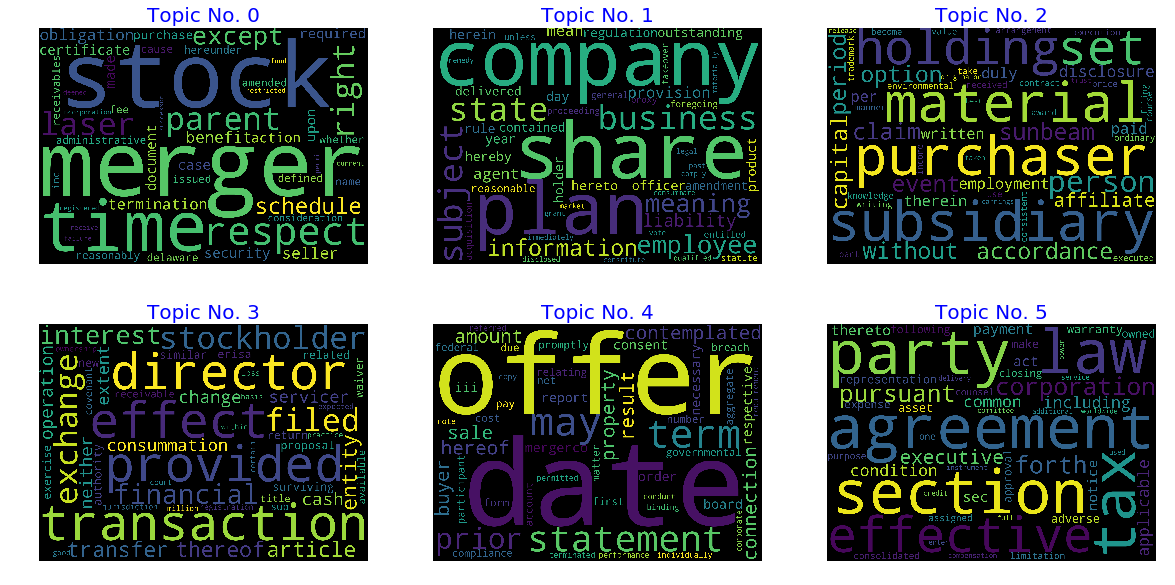

In [24]:
# Worldcloud for the first topic
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
f,ax=plt.subplots(2,3,figsize=(20,10))

first = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1800).generate(" ".join(first_topic_words))
second = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1800).generate(" ".join(second_topic_words))
third = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1800).generate(" ".join(third_topic_words))
fourth = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1800).generate(" ".join(fourth_topic_words))
fifth = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1800).generate(" ".join(fifth_topic_words))
sixth = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1800).generate(" ".join(sixth_topic_words))

l=[first,second,third,fourth,fifth,sixth]
j=0
n=0
k=0
for i in l:
    if n<3:
        ax[j,n].imshow(i)
        ax[j,n].axis('off')
        ax[j,n].set_title('Topic No. {}'.format(n), fontsize=20, color='blue')
        n+=1
    else:
        j=1
        ax[j,k].imshow(i)
        ax[j,k].axis('off')
        ax[j,k].set_title('Topic No. {}'.format(k+3), fontsize=20, color='blue')
        k+=1
    
    
plt.show()